# ADA - Técnicas de Programação I - Projeto Final

## Professor: Bruno Issamo

## Grupo 2:

*   Dimitri Santana Marinho
*   Erick Santos do Nascimento
*   Ewerton Da Silva Costa
*   Jansen Cruz de Souza
*   Maicon Serrão Gavino

### TEMA: COVID -19

**Contexto**

  COVID-19 é um vírus (mais especificamente, um coronavírus) identificado como a causa de um surto de doença respiratória detectado pela primeira vez em Wuhan, China. A pandemia coronavírus (COVID19), período 2019-2022,  é uma pandemia global contínua da doença causada pela síndrome respiratória aguda grave coronavirus 2 (SARS-CoV-2). O vírus surgiu em dezembro de 2019 e em 11 de março de 2020, a Organização Mundial da Saúde declarou o surto como uma pandemia.
   
Esse conjunto de dados tem informações sobre o número de casos afetados, óbitos e recuperação do novo coronavírus de 2019. Por favor, note que esses dados foram obtidos de https://www.worldometers.info/coronavirus/ e são apenas para fins educativos.

**Proposta**

Este projeto tem por finalidade realizar um EDA (Exploratory Data Analysis) com os conhecimentos obtidos no módulo DS-PY-004 TÉCNICAS DE PROGRAMAÇÃO I (PY) - Turma 889 - Diversidade Tech - Suzano, a partir de análises univariada e multivariada das informações.

## Carregando os dados

In [40]:
# Bibliotecas utilizadas
import pandas as pd
import numpy as np

In [41]:
# Importando os dataset
data = pd.read_csv('Covid 19.csv', decimal='.')
data

,#,"Country,\nOther",Total\nCases,New\nCases,Total\nDeaths,New\nDeaths,Total\nRecovered,New\nRecovered,Active\nCases,"Serious,\nCritical",Tot Cases/\n1M pop,Deaths/\n1M pop,Total\nTests,Tests/\n1M pop,Population
0,NaN,World,"640,074,717","190,574","6,614,850",384.0,"619,578,181","220,171","13,881,686","35,805","82,116",848.6,NaN,NaN,NaN
1,1.0,USA,"99,890,506",NaN,"1,100,121",NaN,"97,397,206",NaN,"1,393,179","2,648","298,354","3,286","1,134,187,878","3,387,605","334,805,269"
2,2.0,India,"44,665,643",NaN,"530,528",NaN,"44,122,562",NaN,"12,553",698,"31,754",377,"902,386,407","641,523","1,406,631,776"
3,3.0,France,"37,094,441",NaN,"157,704",NaN,"36,410,647",NaN,"526,09",869,"565,598","2,405","271,490,188","4,139,547","65,584,518"
4,4.0,Germany,"36,033,394",NaN,"155,588",NaN,"34,914,900","21,6","962,906","1,406","429,564","1,855","122,332,384","1,458,359","83,883,596"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,226.0,Diamond Princess,712,NaN,13,NaN,699,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
227,227.0,Niue,85,NaN,NaN,NaN,85,NaN,0,NaN,"52,404",NaN,NaN,NaN,"1,622"
228,228.0,Vatican City,29,NaN,NaN,NaN,29,NaN,0,NaN,"36,295",NaN,NaN,NaN,799
229,229.0,Western Sahara,10,NaN,1,NaN,9,NaN,0,NaN,16,2,NaN,NaN,"626,161"


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   #                  230 non-null    float64
 1   Country,
Other     231 non-null    object 
 2   Total
Cases        231 non-null    object 
 3   New
Cases          31 non-null     object 
 4   Total
Deaths       226 non-null    object 
 5   New
Deaths         17 non-null     float64
 6   Total
Recovered    214 non-null    object 
 7   New
Recovered      36 non-null     object 
 8   Active
Cases       215 non-null    object 
 9   Serious,
Critical  142 non-null    object 
 10  Tot Cases/
1M pop  229 non-null    object 
 11  Deaths/
1M pop     224 non-null    object 
 12  Total
Tests        214 non-null    object 
 13  Tests/
1M pop      214 non-null    object 
 14  Population         228 non-null    object 
dtypes: float64(2), object(13)
memory usage: 27.2+ KB


**OBS1:** Nota-se que existe um caracter especial que quebra a linha ("\n"), e a vírgula (",") como separador de texto.

**OBS2:** Nota-se que o tipo das colunas são objetos e não números, portanto, é preciso realizar a conversão.

## Limpeza e tratamento dos Dados

#### 1 - Como primeiro tratamento substitui-se os nomes das colunas, retirando o caracter especial de quebra de linha, bem como a vírgula.

In [43]:
data.columns = data.columns.str.replace("\n", " ").astype(str)
data.columns = data.columns.str.replace(", ", "/").astype(str)
data.head()

,#,Country/Other,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,Serious/Critical,Tot Cases/ 1M pop,Deaths/ 1M pop,Total Tests,Tests/ 1M pop,Population
0,NaN,World,"640,074,717","190,574","6,614,850",384.0,"619,578,181","220,171","13,881,686","35,805","82,116",848.6,NaN,NaN,NaN
1,1.0,USA,"99,890,506",NaN,"1,100,121",NaN,"97,397,206",NaN,"1,393,179","2,648","298,354","3,286","1,134,187,878","3,387,605","334,805,269"
2,2.0,India,"44,665,643",NaN,"530,528",NaN,"44,122,562",NaN,"12,553",698,"31,754",377,"902,386,407","641,523","1,406,631,776"
3,3.0,France,"37,094,441",NaN,"157,704",NaN,"36,410,647",NaN,"526,09",869,"565,598","2,405","271,490,188","4,139,547","65,584,518"
4,4.0,Germany,"36,033,394",NaN,"155,588",NaN,"34,914,900","21,6","962,906","1,406","429,564","1,855","122,332,384","1,458,359","83,883,596"


#### 2 - Em seguida, percebe-se que a primeira coluna ("#") não tem sentido analítico. Logo, realiza-se sua remoção.

In [44]:
data.drop(['#'], axis=1, inplace=True)
data.head()

,Country/Other,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,Serious/Critical,Tot Cases/ 1M pop,Deaths/ 1M pop,Total Tests,Tests/ 1M pop,Population
0,World,"640,074,717","190,574","6,614,850",384.0,"619,578,181","220,171","13,881,686","35,805","82,116",848.6,NaN,NaN,NaN
1,USA,"99,890,506",NaN,"1,100,121",NaN,"97,397,206",NaN,"1,393,179","2,648","298,354","3,286","1,134,187,878","3,387,605","334,805,269"
2,India,"44,665,643",NaN,"530,528",NaN,"44,122,562",NaN,"12,553",698,"31,754",377,"902,386,407","641,523","1,406,631,776"
3,France,"37,094,441",NaN,"157,704",NaN,"36,410,647",NaN,"526,09",869,"565,598","2,405","271,490,188","4,139,547","65,584,518"
4,Germany,"36,033,394",NaN,"155,588",NaN,"34,914,900","21,6","962,906","1,406","429,564","1,855","122,332,384","1,458,359","83,883,596"


#### 3 - A conversão das colunas que não estão em formato númerico ocorre através da seguinte estrutura de comando:

In [45]:
for col in data.columns:
    if col not in ["Country/Other","New Deaths"]:
        data[col] = data[col].str.replace(",", "").astype(float)
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country/Other      231 non-null    object 
 1   Total Cases        231 non-null    float64
 2   New Cases          31 non-null     float64
 3   Total Deaths       226 non-null    float64
 4   New Deaths         17 non-null     float64
 5   Total Recovered    214 non-null    float64
 6   New Recovered      36 non-null     float64
 7   Active Cases       215 non-null    float64
 8   Serious/Critical   142 non-null    float64
 9   Tot Cases/ 1M pop  229 non-null    float64
 10  Deaths/ 1M pop     224 non-null    float64
 11  Total Tests        214 non-null    float64
 12  Tests/ 1M pop      214 non-null    float64
 13  Population         228 non-null    float64
dtypes: float64(13), object(1)
memory usage: 25.4+ KB


#### 4 - Investigando os **NaN** do DataFrame:

In [46]:
(data.isnull().sum() / len(data))*100

Country/Other         0.000000
Total Cases           0.000000
New Cases            86.580087
Total Deaths          2.164502
New Deaths           92.640693
Total Recovered       7.359307
New Recovered        84.415584
Active Cases          6.926407
Serious/Critical     38.528139
Tot Cases/ 1M pop     0.865801
Deaths/ 1M pop        3.030303
Total Tests           7.359307
Tests/ 1M pop         7.359307
Population            1.298701
dtype: float64

4.1 - Entende-se que algumas colunas, como por exemplo: novos casos, novas mortes e novos recuperados, não são dados significativos pois possuem uma informação temporal, sendo que o *dataset* é composto por dados gerais do período pandêmico. Dessa forma, apresentam uma grande quantidade de informação vazia e não teria impacto em nossa análise. Portanto, realiza-se a remoção destas colunas.

In [47]:
data.drop(['New Cases','New Deaths','New Recovered'], axis=1, inplace=True)
data.head()

,Country/Other,Total Cases,Total Deaths,Total Recovered,Active Cases,Serious/Critical,Tot Cases/ 1M pop,Deaths/ 1M pop,Total Tests,Tests/ 1M pop,Population
0,World,640074717.0,6614850.0,619578181.0,13881686.0,35805.0,82116.0,848.6,NaN,NaN,NaN
1,USA,99890506.0,1100121.0,97397206.0,1393179.0,2648.0,298354.0,3286.0,1.134188e+09,3387605.0,3.348053e+08
2,India,44665643.0,530528.0,44122562.0,12553.0,698.0,31754.0,377.0,9.023864e+08,641523.0,1.406632e+09
3,France,37094441.0,157704.0,36410647.0,52609.0,869.0,565598.0,2405.0,2.714902e+08,4139547.0,6.558452e+07
4,Germany,36033394.0,155588.0,34914900.0,962906.0,1406.0,429564.0,1855.0,1.223324e+08,1458359.0,8.388360e+07


4.2 - Devido as informações serem numéricas, os valores **NaN** serão tratados como zero

In [48]:
data.fillna(0, inplace=True)
data.head()

,Country/Other,Total Cases,Total Deaths,Total Recovered,Active Cases,Serious/Critical,Tot Cases/ 1M pop,Deaths/ 1M pop,Total Tests,Tests/ 1M pop,Population
0,World,640074717.0,6614850.0,619578181.0,13881686.0,35805.0,82116.0,848.6,0.000000e+00,0.0,0.000000e+00
1,USA,99890506.0,1100121.0,97397206.0,1393179.0,2648.0,298354.0,3286.0,1.134188e+09,3387605.0,3.348053e+08
2,India,44665643.0,530528.0,44122562.0,12553.0,698.0,31754.0,377.0,9.023864e+08,641523.0,1.406632e+09
3,France,37094441.0,157704.0,36410647.0,52609.0,869.0,565598.0,2405.0,2.714902e+08,4139547.0,6.558452e+07
4,Germany,36033394.0,155588.0,34914900.0,962906.0,1406.0,429564.0,1855.0,1.223324e+08,1458359.0,8.388360e+07


#### 5 - Observa-se na tabela acima a informação dos dados no mundo ('World'), na primeira linha (índice zero). Sua consistência será verificada através da soma dos valores de todos os outros países, conforme código abaixo:

In [49]:
# Transformando o df para uma linha com world e o restante com o nome de paises,para serem agrupados
df = data.copy()
df.loc[1:,'Country/Other'] = 'paises'
# Agrupando os valores
df.pivot_table(index='Country/Other',
                values=('Total Cases','Total Deaths','Total Recovered','Total Tests'),
                aggfunc=sum
            )

,Total Cases,Total Deaths,Total Recovered,Total Tests
Country/Other,,,,
World,640074717.0,6614850.0,619578181.0,0.000000e+00
paises,636884937.0,5847159.0,614642085.0,6.807206e+09


5.1 - Portanto, para realizar a análise exploratória dos dados, realiza-se a remoção desta linha, conforme execução do código abaixo:

In [50]:
data.drop([data.index[0]],axis=0,inplace=True)
data.reset_index(drop=True, inplace=True)
data.head()

,Country/Other,Total Cases,Total Deaths,Total Recovered,Active Cases,Serious/Critical,Tot Cases/ 1M pop,Deaths/ 1M pop,Total Tests,Tests/ 1M pop,Population
0,USA,99890506.0,1100121.0,97397206.0,1393179.0,2648.0,298354.0,3286.0,1.134188e+09,3387605.0,3.348053e+08
1,India,44665643.0,530528.0,44122562.0,12553.0,698.0,31754.0,377.0,9.023864e+08,641523.0,1.406632e+09
2,France,37094441.0,157704.0,36410647.0,52609.0,869.0,565598.0,2405.0,2.714902e+08,4139547.0,6.558452e+07
3,Germany,36033394.0,155588.0,34914900.0,962906.0,1406.0,429564.0,1855.0,1.223324e+08,1458359.0,8.388360e+07
4,Brazil,34949418.0,688705.0,34115188.0,145525.0,8318.0,162289.0,3198.0,6.377617e+07,296146.0,2.153536e+08


#### 6 - Verificando a consistência dos dados

In [51]:
data.describe()

,Total Cases,Total Deaths,Total Recovered,Active Cases,Serious/Critical,Tot Cases/ 1M pop,Deaths/ 1M pop,Total Tests,Tests/ 1M pop,Population
count,2.300000e+02,2.300000e+02,2.300000e+02,2.300000e+02,230.000000,230.000000,230.000000,2.300000e+02,2.300000e+02,2.300000e+02
mean,2.769065e+06,2.542243e+04,2.672357e+06,5.142981e+04,139.786957,166040.513043,1079.108696,2.959655e+07,1.913695e+06,3.453629e+07
std,9.005632e+06,9.953674e+04,8.778950e+06,2.256993e+05,700.756181,188042.423147,1233.386991,1.118119e+08,3.460888e+06,1.383550e+08
min,9.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.976175e+04,1.650000e+02,1.018350e+04,5.675000e+01,0.000000,7351.000000,111.000000,1.883830e+05,6.118775e+04,3.999745e+05
50%,1.704200e+05,1.376500e+03,9.991150e+04,7.085000e+02,3.000000,79597.500000,593.500000,1.699692e+06,6.859680e+05,5.676382e+06
75%,1.270214e+06,1.066775e+04,1.246472e+06,1.266550e+04,23.750000,283290.500000,1677.500000,1.145513e+07,2.100701e+06,2.197109e+07
max,9.989051e+07,1.100121e+06,9.739721e+07,2.507004e+06,8318.000000,703959.000000,6447.000000,1.134188e+09,2.222890e+07,1.448471e+09


6.1 - Observa-se que os dois pontos que são *outliers* correspondem aos países mais populosos: China e Índia. Para saber se os dados da população trazem alguma inconsistência para o *dataset*, verifica-se o ordenamento dos valores:

<AxesSubplot:>

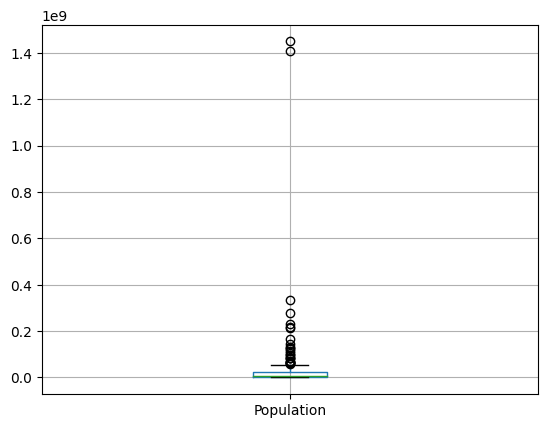

In [72]:
data.boxplot(column='Population')

In [53]:
data.sort_values(['Population'], ascending=True)

,Country/Other,Total Cases,Total Deaths,Total Recovered,Active Cases,Serious/Critical,Tot Cases/ 1M pop,Deaths/ 1M pop,Total Tests,Tests/ 1M pop,Population
229,MS Zaandam,9.0,2.0,7.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.000000e+00
225,Diamond Princess,712.0,13.0,699.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.000000e+00
227,Vatican City,29.0,0.0,29.0,0.0,0.0,36295.0,0.0,0.000000e+00,0.0,7.990000e+02
216,Anguilla,3904.0,12.0,3879.0,13.0,4.0,256336.0,788.0,5.138200e+04,3373736.0,1.523000e+03
226,Niue,85.0,0.0,85.0,0.0,0.0,52404.0,0.0,0.000000e+00,0.0,1.622000e+03
...,...,...,...,...,...,...,...,...,...,...,...
52,Pakistan,1574597.0,30629.0,1538689.0,5279.0,55.0,6861.0,133.0,3.057086e+07,133213.0,2.294890e+08
19,Indonesia,6556627.0,159068.0,6348259.0,493.0,2771.0,23489.0,570.0,1.112255e+08,398465.0,2.791345e+08
0,USA,99890506.0,1100121.0,97397206.0,1393179.0,2648.0,298354.0,3286.0,1.134188e+09,3387605.0,3.348053e+08
1,India,44665643.0,530528.0,44122562.0,12553.0,698.0,31754.0,377.0,9.023864e+08,641523.0,1.406632e+09


6.2 - Verifica-se que duas regiões MS Zaandam (index 229) e Diamond Princess (index 225) não possuem o dado de população, por isso serão removidas.

In [54]:
# Removendo index de população zero
data.drop([data.index[229],data.index[225]], axis= 0,inplace=True)
data.reset_index(drop=True, inplace=True)
data.sort_values(['Population'], ascending=True).head()

,Country/Other,Total Cases,Total Deaths,Total Recovered,Active Cases,Serious/Critical,Tot Cases/ 1M pop,Deaths/ 1M pop,Total Tests,Tests/ 1M pop,Population
226,Vatican City,29.0,0.0,29.0,0.0,0.0,36295.0,0.0,0.0,0.0,799.0
216,Anguilla,3904.0,12.0,3879.0,13.0,4.0,256336.0,788.0,51382.0,3373736.0,1523.0
225,Niue,85.0,0.0,85.0,0.0,0.0,52404.0,0.0,0.0,0.0,1622.0
219,Falkland Islands,193.0,0.0,193.0,0.0,0.0,545352.0,0.0,8632.0,2439107.0,3539.0
193,Saint Martin,12026.0,63.0,1399.0,10564.0,7.0,302693.0,1586.0,112382.0,2828643.0,3973.0


6.3 - Além disso, algumas colunas que possuem a informação por *1M de pop* não poderam ser considerados casos *outliers*, pois as regiões com população inferior a um milhão de habitantes também possuem representatividade.

In [55]:
data.query('Population < 1_000_000').sort_values(by= 'Population')

,Country/Other,Total Cases,Total Deaths,Total Recovered,Active Cases,Serious/Critical,Tot Cases/ 1M pop,Deaths/ 1M pop,Total Tests,Tests/ 1M pop,Population
226,Vatican City,29.0,0.0,29.0,0.0,0.0,36295.0,0.0,0.0,0.0,799.0
216,Anguilla,3904.0,12.0,3879.0,13.0,4.0,256336.0,788.0,51382.0,3373736.0,1523.0
225,Niue,85.0,0.0,85.0,0.0,0.0,52404.0,0.0,0.0,0.0,1622.0
219,Falkland Islands,193.0,0.0,193.0,0.0,0.0,545352.0,0.0,8632.0,2439107.0,3539.0
193,Saint Martin,12026.0,63.0,1399.0,10564.0,7.0,302693.0,1586.0,112382.0,2828643.0,3973.0
...,...,...,...,...,...,...,...,...,...,...,...
147,Bhutan,6243.0,21.0,61564.0,845.0,0.0,79232.0,27.0,2303734.0,2923739.0,787941.0
140,Guyana,71461.0,1281.0,70153.0,27.0,0.0,89996.0,1613.0,703255.0,885661.0,794045.0
202,Comoros,8879.0,161.0,8587.0,131.0,0.0,9785.0,177.0,0.0,0.0,907419.0
91,Réunion,47462.0,899.0,418572.0,55149.0,10.0,522674.0,990.0,1603660.0,1766027.0,908061.0


In [56]:
# Contando a quantidade de localidades inferior a 1M
data[['Tot Cases/ 1M pop', 'Deaths/ 1M pop', 'Tests/ 1M pop','Population']].query('Population < 1_000_000').count()

Tot Cases/ 1M pop    70
Deaths/ 1M pop       70
Tests/ 1M pop        70
Population           70
dtype: int64

# Análise Exploratória dos Dados (EDA)

Após a limpeza e tratamento dos dados, pode-se alencar os seguintes questionamentos:

1 -  Qual o panorama da pandemia por país?

2 - Qual a representatividade na população total de cada país? 

3 - Qual a mortalidade (razão entre o Número Total de Mortes e o Número Total de Casos) para cada países?

4 - Qual o comportamento por continente?

#### 1 - Qual o panorama da pandemia por país?  


In [57]:
data[['Country/Other','Total Cases', 'Total Deaths','Total Recovered','Population']]

,Country/Other,Total Cases,Total Deaths,Total Recovered,Population
0,USA,99890506.0,1100121.0,97397206.0,3.348053e+08
1,India,44665643.0,530528.0,44122562.0,1.406632e+09
2,France,37094441.0,157704.0,36410647.0,6.558452e+07
3,Germany,36033394.0,155588.0,34914900.0,8.388360e+07
4,Brazil,34949418.0,688705.0,34115188.0,2.153536e+08
...,...,...,...,...,...
223,Macao,795.0,6.0,787.0,6.674900e+04
224,Wallis and Futuna,761.0,7.0,438.0,1.098200e+04
225,Niue,85.0,0.0,85.0,1.622000e+03
226,Vatican City,29.0,0.0,29.0,7.990000e+02


1.1 - Qual a representatividade na população total de cada país? 

In [58]:
informacoes = data[['Total Cases', 'Total Deaths','Total Recovered']].div(data['Population'], axis=0)  
informacoes = (informacoes*100).round(2).astype(str) + '%'
df_1 = pd.concat([data['Country/Other'],informacoes], axis=1)
df_1.set_index(keys='Country/Other',inplace=True)
df_1.head(10)

,Total Cases,Total Deaths,Total Recovered
Country/Other,,,
USA,29.84%,0.33%,29.09%
India,3.18%,0.04%,3.14%
France,56.56%,0.24%,55.52%
Germany,42.96%,0.19%,41.62%
Brazil,16.23%,0.32%,15.84%
S. Korea,50.94%,0.06%,49.34%
UK,34.97%,0.03%,34.5%
Italy,39.53%,0.3%,38.54%
Japan,18.4%,0.04%,16.37%


1.2 - Maior número de mortes, em porcentagem, por país:

In [59]:
df_1.sort_values(['Total Deaths'],ascending=False).head(10)

,Total Cases,Total Deaths,Total Recovered
Country/Other,,,
Montenegro,451.1%,4.44%,446.17%
Belize,167.33%,1.67%,165.64%
Saint Martin,302.69%,1.59%,35.21%
Anguilla,256.34%,0.79%,254.69%
Peru,12.38%,0.64%,11.69%
Bulgaria,18.75%,0.55%,18.08%
Bosnia and Herzegovina,12.32%,0.5%,11.63%
Hungary,22.42%,0.5%,21.68%
North Macedonia,16.54%,0.46%,16.06%


1.3 - Menor número de mortes, em porcentagem, por país:

In [60]:
df_1.sort_values(['Total Deaths'],ascending=True).head(10)

,Total Cases,Total Deaths,Total Recovered
Country/Other,,,
Western Sahara,0.0%,0.0%,0.0%
DPRK,18.36%,0.0%,18.36%
Eritrea,0.28%,0.0%,0.28%
Vanuatu,3.71%,0.0%,3.71%
Uganda,0.35%,0.0%,0.21%
CAR,0.3%,0.0%,0.29%
Madagascar,0.23%,0.0%,0.22%
Tajikistan,0.18%,0.0%,0.17%
South Sudan,0.16%,0.0%,0.16%


#### 2 - Qual a porcentagem de cada coluna pela soma do total de casos?

In [61]:
df_2 = pd.concat([
                data['Country/Other'],
                data['Total Cases']/data['Total Cases'].sum(),
                data['Total Deaths']/data['Total Deaths'].sum(),
                data['Total Recovered']/data['Total Recovered'].sum()
                ],axis=1)
df_2.set_index(keys='Country/Other',inplace=True)
df_2 = (df_2*100).round(2).astype(str) + '%'
df_2.head(10)

,Total Cases,Total Deaths,Total Recovered
Country/Other,,,
USA,15.68%,18.81%,15.85%
India,7.01%,9.07%,7.18%
France,5.82%,2.7%,5.92%
Germany,5.66%,2.66%,5.68%
Brazil,5.49%,11.78%,5.55%
S. Korea,4.11%,0.51%,4.12%
UK,3.76%,0.33%,3.85%
Italy,3.74%,3.08%,3.78%
Japan,3.63%,0.81%,3.34%


2.1 - Maior índice de casos de infectados, com relação a soma dos valores do Total de Casos:

In [62]:
df_2.sort_values(['Total Cases'],ascending=False).round(4).head(10)

,Total Cases,Total Deaths,Total Recovered
Country/Other,,,
India,7.01%,9.07%,7.18%
France,5.82%,2.7%,5.92%
Germany,5.66%,2.66%,5.68%
Brazil,5.49%,11.78%,5.55%
S. Korea,4.11%,0.51%,4.12%
UK,3.76%,0.33%,3.85%
Italy,3.74%,3.08%,3.78%
Japan,3.63%,0.81%,3.34%
Russia,3.37%,6.69%,3.4%


2.2 - Maior índice de morte, com relação a soma dos valores do Total de Mortes:

In [63]:
df_2.sort_values(['Total Deaths'],ascending=False).round(4).head(10)

,Total Cases,Total Deaths,Total Recovered
Country/Other,,,
India,7.01%,9.07%,7.18%
Russia,3.37%,6.69%,3.4%
Peru,0.65%,3.71%,0.64%
Italy,3.74%,3.08%,3.78%
Indonesia,1.03%,2.72%,1.03%
France,5.82%,2.7%,5.92%
Germany,5.66%,2.66%,5.68%
Iran,1.19%,2.47%,1.19%
Colombia,0.99%,2.43%,1.0%


#### 3 - Qual a mortalidade (razão entre o Número Total de Mortes e o Número Total de Casos) para cada países?


In [64]:
data['Deaths/Cases'] = (data['Total Deaths'].div(data['Total Cases'], axis=0)*100).round(2).astype(str) + '%'
mortes_numero_casos = pd.concat([data['Country/Other'],data['Total Cases'],data['Total Deaths'],data['Deaths/Cases']],axis=1)
mortes_numero_casos.head(10)

,Country/Other,Total Cases,Total Deaths,Deaths/Cases
0,USA,99890506.0,1100121.0,1.1%
1,India,44665643.0,530528.0,1.19%
2,France,37094441.0,157704.0,0.43%
3,Germany,36033394.0,155588.0,0.43%
4,Brazil,34949418.0,688705.0,1.97%
5,S. Korea,26145764.0,29617.0,0.11%
6,UK,23954192.0,19553.0,0.08%
7,Italy,23823192.0,179985.0,0.76%
8,Japan,23109816.0,47512.0,0.21%
9,Russia,21494588.0,390964.0,1.82%


3.1 - Ordenando pelos maiores casos de mortalidade

In [65]:
mortes_numero_casos.sort_values(['Deaths/Cases'],ascending=False).head(10)

,Country/Other,Total Cases,Total Deaths,Deaths/Cases
74,Latvia,95678.0,6076.0,6.35%
148,Syria,57378.0,3163.0,5.51%
34,Peru,4169751.0,217172.0,5.21%
117,Guadeloupe,19627.0,993.0,5.06%
170,Somalia,27254.0,1361.0,4.99%
88,Egypt,515645.0,24613.0,4.77%
187,Dominica,1576.0,74.0,4.7%
84,Estonia,60778.0,2757.0,4.54%
177,Liechtenstein,2075.0,87.0,4.19%
95,Bosnia and Herzegovina,400185.0,16184.0,4.04%


#### 4 - Qual o comportamento por continente?

In [66]:
# Importanto os paises de cada região 
europe = pd.read_excel('./covid_19_complete.xlsx',sheet_name='europe').set_index(keys='Country,\nOther')
north_america = pd.read_excel('./covid_19_complete.xlsx',sheet_name='north america').set_index(keys='Country,\nOther')
south_america = pd.read_excel('./covid_19_complete.xlsx',sheet_name='south america').set_index(keys='Country,\nOther')
asia = pd.read_excel('./covid_19_complete.xlsx',sheet_name='asia').set_index(keys='Country,\nOther')
africa = pd.read_excel('./covid_19_complete.xlsx',sheet_name='africa').set_index(keys='Country,\nOther')
oceania = pd.read_excel('./covid_19_complete.xlsx',sheet_name='europe').set_index(keys='Country,\nOther')

# Criando um dicionário com o país e o seu respectivo continente
continentes = {}
for pais in europe.index:
    continentes[pais] = 'europe' 
for pais in north_america.index:
    continentes[pais] = 'north america' 
for pais in south_america.index:
    continentes[pais] = 'south america' 
for pais in asia.index:
    continentes[pais] = 'asia' 
for pais in africa.index:
    continentes[pais] = 'africa' 
for pais in oceania.index:
    continentes[pais] = 'oceania' 

# Criando uma coluna com o respectivo continente de cada país
data['Continent'] = data['Country/Other'].map(continentes)
data.set_index(keys='Continent',inplace=True)

continente_df = data.pivot_table(index='Continent', values=('Total Cases','Total Deaths','Total Recovered'), aggfunc=sum)
continente_df 

,Total Cases,Total Deaths,Total Recovered
Continent,,,
africa,11642985.0,242721.0,9882664.0
asia,195273544.0,1487431.0,186777352.0
north america,118150010.0,1203843.0,113451254.0
oceania,234478383.0,1571655.0,229253689.0
south america,64605582.0,1333945.0,62876666.0


4.1 - Análise das informações, por continente, com relação ao total global de seus respectivo tópico

In [67]:
df_4 = pd.concat([(continente_df['Total Cases']/data['Total Cases'].sum())*100,
                (continente_df['Total Deaths']/data['Total Deaths'].sum())*100,
                (continente_df['Total Recovered']/data['Total Recovered'].sum())*100],
                axis=1)
df_4 = df_4.round(2).astype(str) + '%'
df_4.head(10)

,Total Cases,Total Deaths,Total Recovered
Continent,,,
africa,1.83%,4.15%,1.61%
asia,30.66%,25.44%,30.39%
north america,18.55%,20.59%,18.46%
oceania,36.82%,26.88%,37.3%
south america,10.14%,22.81%,10.23%


4.2 - Análise das informações, por continente, com relação ao contingente populacional de cada continente

In [68]:
# Agrupando a população de cada continente
populacao_continente = data.pivot_table(index='Continent', values=('Population'), aggfunc=sum)
populacao_continente

,Population
Continent,
africa,1.406729e+09
asia,4.710756e+09
north america,5.977205e+08
oceania,7.469787e+08
south america,4.376944e+08


In [69]:
# Estruturando os dados pela população de cada continente
dados_continente_populacao = continente_df.copy()
for name in continente_df.index:
    dados_continente_populacao [name:name :] = (continente_df[name:name :]/populacao_continente['Population'][name])*100
    
dados_continente_populacao = dados_continente_populacao.round(2).astype(str) + '%'
dados_continente_populacao.sort_values(['Continent'],ascending=True)

,Total Cases,Total Deaths,Total Recovered
Continent,,,
africa,0.83%,0.02%,0.7%
asia,4.15%,0.03%,3.96%
north america,19.77%,0.2%,18.98%
oceania,31.39%,0.21%,30.69%
south america,14.76%,0.3%,14.37%
